In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing,linear_model
import os,sys
import matplotlib.pyplot as plt

In [3]:
data = np.array([[3, -1.5, 2, -5.4],[0, 4, -0.3, 2.1],[1, 3.3, -1.9, -4.3]])
data.shape

(3, 4)

In [4]:
#standardised data
data_standard = preprocessing.scale(data)
print(data_standard)
#finding mean and std dev to prove data is standardised
average = data_standard.mean(axis=0)
std_dev = data_standard.std(axis=0)
print("Mean is {} while std_dev is {}".format(average,std_dev))
#scaled data
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(data)
print("Without scaled ranged \n {} \n With scaled range \n {}".format(data_standard,scaled))

[[ 1.33630621 -1.40451644  1.29110641 -0.86687558]
 [-1.06904497  0.84543708 -0.14577008  1.40111286]
 [-0.26726124  0.55907936 -1.14533633 -0.53423728]]
Mean is [ 5.55111512e-17 -1.11022302e-16 -7.40148683e-17 -7.40148683e-17] while std_dev is [1. 1. 1. 1.]
Without scaled ranged 
 [[ 1.33630621 -1.40451644  1.29110641 -0.86687558]
 [-1.06904497  0.84543708 -0.14577008  1.40111286]
 [-0.26726124  0.55907936 -1.14533633 -0.53423728]] 
 With scaled range 
 [[1.         0.         1.         0.        ]
 [0.         1.         0.41025641 1.        ]
 [0.33333333 0.87272727 0.         0.14666667]]


In [5]:
#Hot encoding where I need to do alot alot alot of work to understand
hot_encoder = preprocessing.OneHotEncoder()
hot_encoder.fit_transform([[0, 2, 1, 12], [1, 3, 5, 3], [2, 3, 2, 12], [1, 2, 4, 3]]) 
encoded_vector = hot_encoder.transform([[2,3,5,3]]).toarray()
print("{}".format(encoded_vector))

[[0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]]


In [6]:
#Label encoding rather easy to understand
label_encoder = preprocessing.LabelEncoder()
input_classes = ['Toyota','Audi','Ferrari','Mobius',"Audi","Nissan","Koenisegg","Buggati","Mobius","Tesla"]
label_encoder.fit(input_classes)
for items,i in enumerate(label_encoder.classes_):
    print("{} => {}".format(items,i))


0 => Audi
1 => Buggati
2 => Ferrari
3 => Koenisegg
4 => Mobius
5 => Nissan
6 => Tesla
7 => Toyota


In [7]:
test_data = ["Buggati","Koenisegg","Toyota","Audi"]
label_encoder.transform(test_data)

array([1, 3, 7, 0], dtype=int64)

In [8]:
label_encoder.inverse_transform([7,7,0,1,2,5,3])

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Toyota', 'Toyota', 'Audi', 'Buggati', 'Ferrari', 'Nissan',
       'Koenisegg'], dtype='<U9')

In [9]:
home = "C:/Users/ADMIN/Documents/Programming/Jupyter"
File_route = home+'/Files/'
dir_items = os.listdir(File_route)
cook_book = dir_items[2]
chapters = os.listdir(File_route+cook_book)
chapter1 = chapters[2]
file_path = File_route+cook_book+"/"+chapter1+"/"
chapters2 = os.listdir(file_path)
chapters2

['bike_day.csv',
 'bike_hour.csv',
 'bike_sharing.py',
 'data_multivar.txt',
 'data_singlevar.txt',
 'housing.py',
 'label_encoder.py',
 'linear_regression_singlevar.py',
 'preprocessing.py',
 'regression_multivar.py']

In [10]:

filename = file_path+chapters2[4]
x = []
y = []
with open(filename) as fileOpen:
    for line in fileOpen:
        xt,yt = [float(i) for i in line.split(',')]
        x.append(xt)
        y.append(yt)

In [11]:
num_training = int(0.9 * len(x))
num_test = len(x) - num_training
#Training data
x_train = np.array(x[:num_training]).reshape(num_training,1)
y_train = np.array(y[:num_training])

#Test data
x_test = np.array(x[num_training:]).reshape(num_test,1)
y_test = np.array(x[num_training:])

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

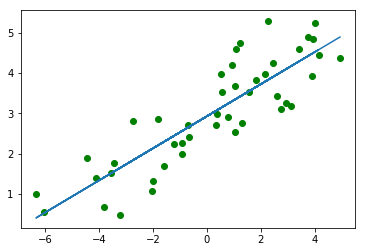

In [12]:
y_train_pred = linear_regressor.predict(x_train)
plt.figure()
plt.scatter(x_train,y_train,color="green")
plt.plot(x_train,y_train_pred)
plt.show()

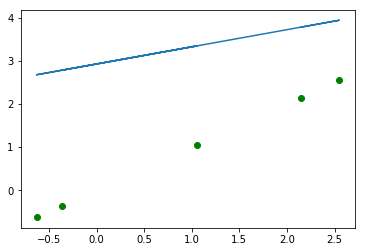

In [13]:
y_test_pred = linear_regressor.predict(x_test)
plt.scatter(x_test,y_test,color="green")
plt.plot(x_test,y_test_pred)
plt.show()

In [15]:
File_route = './Files/'
files = os.listdir(File_route)
house_files = File_route+files[1]
house_files

'./Files/california_housing_train.csv'

In [29]:
houses_df = pd.read_csv(house_files)
#Randomize the dataframe entries to prevent any Bias
ran_houses_df = houses_df.reindex(np.random.permutation(houses_df.index))
ran_houses_df
total_rooms = np.array(ran_houses_df['total_rooms'])
house_values = np.array(ran_houses_df['median_house_value'])

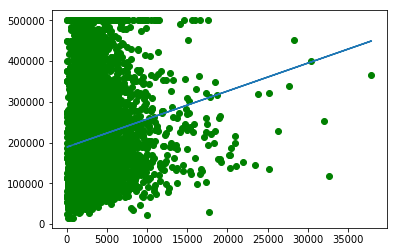

In [30]:
training_amount = int(0.7 * len(total_rooms))
testing_amount = len(total_rooms) - training_amount
#creating x's and y's for training
x_train = np.array(total_rooms[:training_amount]).reshape(training_amount,1)
y_train = np.array(house_values[:training_amount])
#creating x's and y's for testing
x_test = np.array(total_rooms[training_amount:]).reshape(testing_amount,1)
y_test = np.array(house_values[training_amount:])
#Starting regressing
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(x_train,y_train)
y_predicted = linear_regressor.predict(x_train)
plt.figure()
plt.scatter(x_train,y_train,color="green")
plt.plot(x_train,y_predicted)
plt.show()

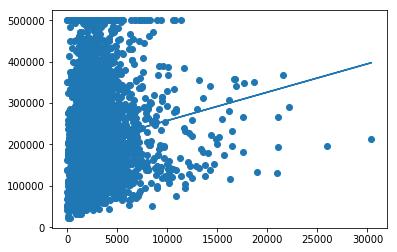

In [32]:
y_predicted_test = linear_regressor.predict(x_test)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predicted_test)


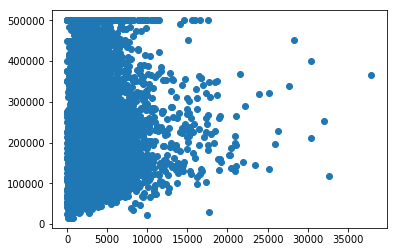

In [33]:
plt.scatter(total_rooms,house_values)

In [34]:
houses_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
